Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [105]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [107]:
# Identify columns that are redundant or not useful
redundant_columns = ['symboling', 'normalized-losses']
for col in redundant_columns:
    if col in automobiles_df.columns:
        automobiles_df.drop(columns=[col], inplace=True)


#### Remove any duplicate rows

In [108]:
# Remove duplicates
automobiles_df.drop_duplicates(inplace=True)

#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [109]:
# Remove rows with missing data 
automobiles_df.replace('?', np.nan, inplace=True)
automobiles_df.dropna(inplace=True)


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [110]:
# Change columns with numerical data to an integer type using int64 method
for col in automobiles_df.columns:
    try:
        automobiles_df[col] = automobiles_df[col].astype(np.int64)
    except ValueError:
        try:
            automobiles_df[col] = automobiles_df[col].astype(float)
        except ValueError:
            pass

### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [111]:
# Create a dataframe with all the cars in the 'hatchback' category
hatchback_cars = automobiles_df[automobiles_df['body-style'] == 'hatchback']

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

Top 5 Most Expensive Cars:
              make  price  horsepower
74   mercedes-benz  45400         184
16             bmw  41315         182
73   mercedes-benz  40960         184
128        porsche  37028         207
17             bmw  36880         182

Cheapest Car:
       make  price  horsepower
138  subaru   5118          69


/var/folders/n6/m9557xys1jlfw7kyj3r9mhcm0000gn/T/ipykernel_68418/4069561740.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_cars, x=most_expensive_cars.index, y='price', palette='viridis')


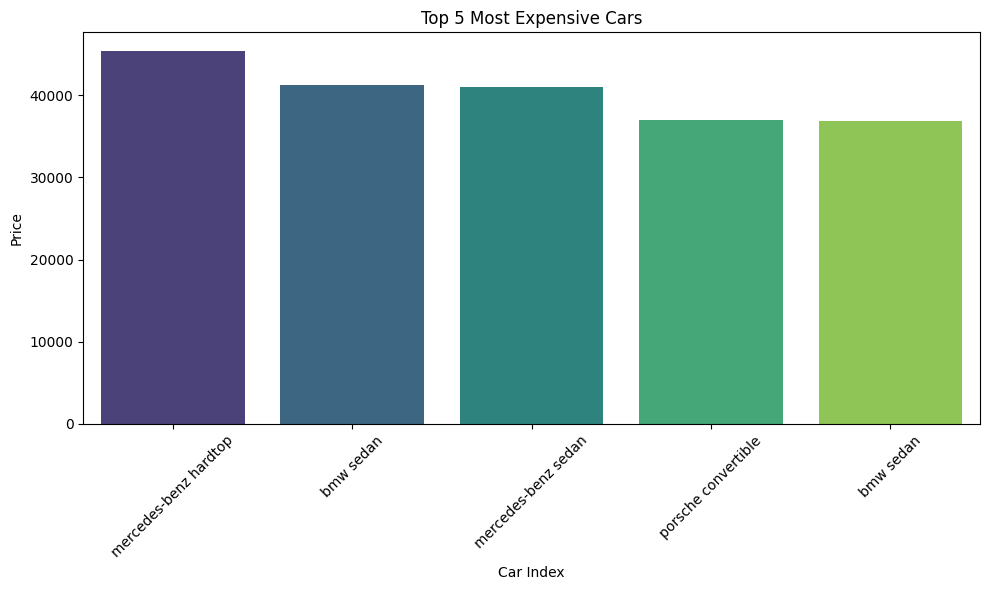

In [112]:
# Convert 'price' to numeric, in case it's not already
automobiles_df['price'] = pd.to_numeric(automobiles_df['price'], errors='coerce')

# Drop rows with missing or invalid 'price' values
automobiles_df.dropna(subset=['price'], inplace=True)

# Sort the dataframe by 'price' in descending order
most_expensive_cars = automobiles_df.sort_values(by='price', ascending=False).head(5)

# Show the most expensive cars
print("Top 5 Most Expensive Cars:")
print(most_expensive_cars[['make', 'price', 'horsepower']])

# Cheapest car 
cheapest_car = automobiles_df.sort_values(by='price').head(1)
print("\nCheapest Car:")
print(cheapest_car[['make', 'price', 'horsepower']])

# Bar Plot comparing prices of the top 5 most expensive cars
most_expensive_cars = most_expensive_cars.reset_index()  # Reset index for plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=most_expensive_cars, x=most_expensive_cars.index, y='price', palette='viridis')
plt.title('Top 5 Most Expensive Cars')
plt.ylabel('Price')
plt.xlabel('Car Index')
plt.xticks(ticks=most_expensive_cars.index, labels=most_expensive_cars['make'] + " " + most_expensive_cars['body-style'], rotation=45)
plt.tight_layout()
plt.show()



#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot


Top 10 Most Fuel-Efficient Car Makes:
         make  average-mpg
0   chevrolet    43.666667
1       honda    32.923077
2  volkswagen    31.750000
3       dodge    31.562500
4    plymouth    31.142857
5       mazda    30.958333
6      toyota    30.203125
7      nissan    29.972222
8      subaru    28.541667
9  mitsubishi    28.038462


/var/folders/n6/m9557xys1jlfw7kyj3r9mhcm0000gn/T/ipykernel_68418/3910679825.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_fuel_efficient, x='make', y='average-mpg', palette='coolwarm')


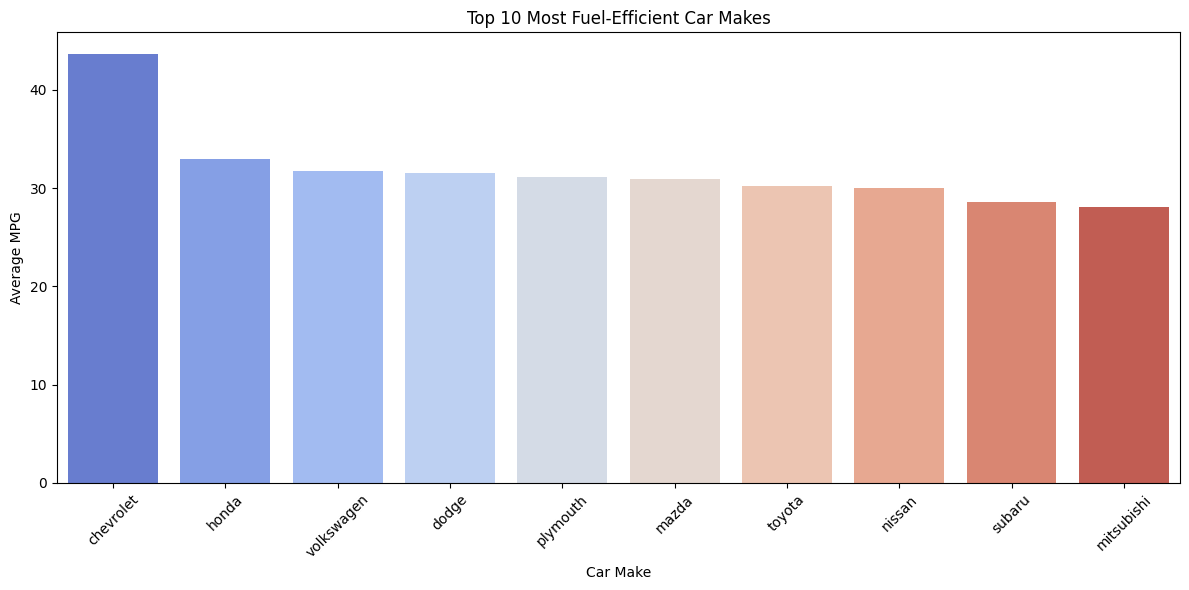

In [113]:
# Convert mpg columns to numeric 
automobiles_df['city-mpg'] = pd.to_numeric(automobiles_df['city-mpg'], errors='coerce')
automobiles_df['highway-mpg'] = pd.to_numeric(automobiles_df['highway-mpg'], errors='coerce')

# Drop rows with missing or invalid mpg values
automobiles_df.dropna(subset=['city-mpg', 'highway-mpg'], inplace=True)

# Create an average mpg column
automobiles_df['average-mpg'] = (automobiles_df['city-mpg'] + automobiles_df['highway-mpg']) / 2

# Group by 'make' and calculate the average mpg
mpg_by_make = automobiles_df.groupby('make')['average-mpg'].mean().sort_values(ascending=False).reset_index()

# Display top 10 most fuel-efficient makes
top_10_fuel_efficient = mpg_by_make.head(10)
print("\nTop 10 Most Fuel-Efficient Car Makes:")
print(top_10_fuel_efficient)

# Plotting the average mpg 
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_fuel_efficient, x='make', y='average-mpg', palette='coolwarm')
plt.title('Top 10 Most Fuel-Efficient Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Average MPG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.


Top 10 Cars with the Largest Engines:
             make  engine-size  horsepower
49         jaguar          326         262
73  mercedes-benz          308         184
74  mercedes-benz          304         184
48         jaguar          258         176
47         jaguar          258         176
71  mercedes-benz          234         155
72  mercedes-benz          234         155
17            bmw          209         182
15            bmw          209         182
16            bmw          209         182


/var/folders/n6/m9557xys1jlfw7kyj3r9mhcm0000gn/T/ipykernel_68418/2605463250.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=largest_engines, x='make', y='engine-size', palette='viridis')


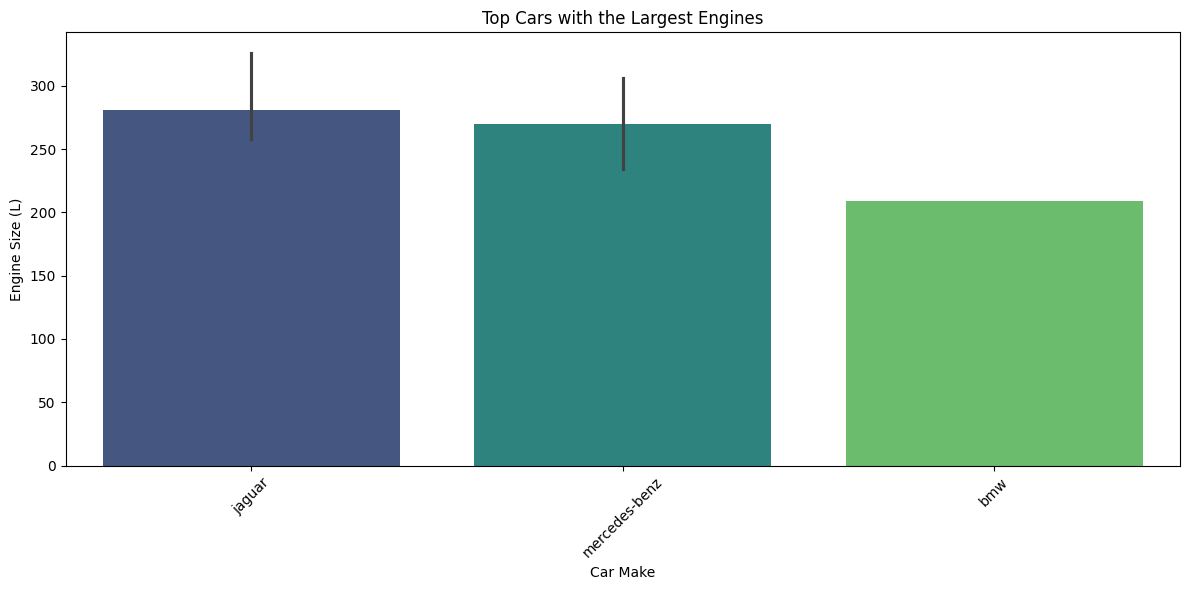

In [114]:
# Convert 'engine-size' to numeric, in case it's not already
automobiles_df['engine-size'] = pd.to_numeric(automobiles_df['engine-size'], errors='coerce')

# Drop rows with missing or invalid 'engine-size' values
automobiles_df.dropna(subset=['engine-size'], inplace=True)

# Sort the dataframe by engine size in descending order
largest_engines = automobiles_df.sort_values(by='engine-size', ascending=False).head(10)

# Display the top 10 cars with the largest engines
print("\nTop 10 Cars with the Largest Engines:")
print(largest_engines[['make', 'engine-size', 'horsepower']])

# Plotting the top 10 cars with the largest engines
plt.figure(figsize=(12, 6))
sns.barplot(data=largest_engines, x='make', y='engine-size', palette='viridis')
plt.title('Top Cars with the Largest Engines')
plt.xlabel('Car Make')
plt.ylabel('Engine Size (L)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Which vehicle manufacturer has the most car models in the dataset


Top Manufacturers by Number of Car Models:
         make  count
0      toyota     32
1      nissan     18
2       honda     13
3  mitsubishi     13
4  volkswagen     12
5      subaru     12
6       mazda     12
7       volvo     11
8      peugot     11
9         bmw      8

Top Manufacturer: make     7
count    0
dtype: int64 with make     volvo
count       32
dtype: object models


/var/folders/n6/m9557xys1jlfw7kyj3r9mhcm0000gn/T/ipykernel_68418/3914339833.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=make_counts.head(10), x='make', y='count', palette='coolwarm')


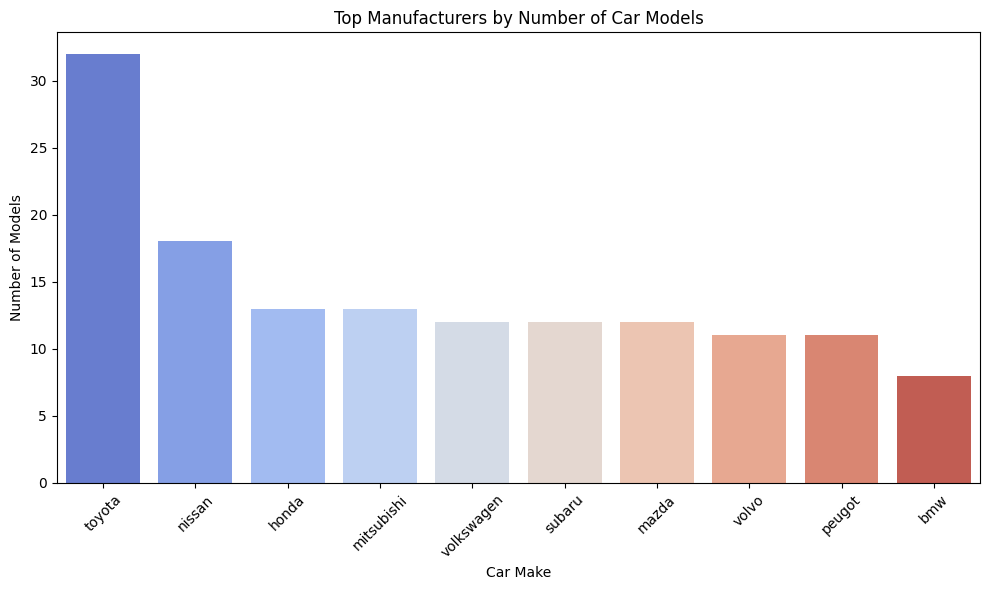

In [115]:
# Group by 'make' and count the number of entries 
make_counts = automobiles_df['make'].value_counts().reset_index()

#Display top manufacturers by the number of car models 
print("\nTop Manufacturers by Number of Car Models:")
print(make_counts.head(10))

# Get the top manufacturer 
top_manufacturer = make_counts.idxmax()
top_count = make_counts.max()
print(f"\nTop Manufacturer: {top_manufacturer} with {top_count} models")

# Bar plot of the top manufacturers
plt.figure(figsize=(10, 6))
sns.barplot(data=make_counts.head(10), x='make', y='count', palette='coolwarm')
plt.title('Top Manufacturers by Number of Car Models')
plt.xlabel('Car Make')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


